c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hinv @ G


Solution found at iteration  8
Solution found at iteration  5
Solution found at iteration  6
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  12
Solution found at iteration  7
Solution found at iteration  8
Solution found at iteration  5
Solution found at iteration  6
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  12
Solution found at iteration  7
Solution found at iteration  8
Solution found at iteration  5
Solution found at iteration  6
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  12
Solution found at iteration  7
Solution found at iteration  8
Solution found at iteration  5
Solution found at iteration  6
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  12
Solution found at iteration  7
Solu

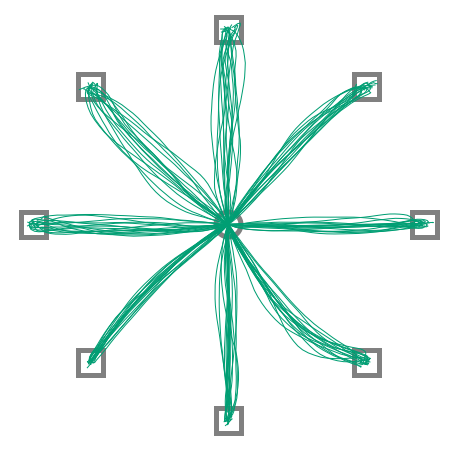

(np.float64(-11.0003469328113),
 np.float64(11.00728558903732),
 np.float64(18.967003879491568),
 np.float64(41.00157124383374))

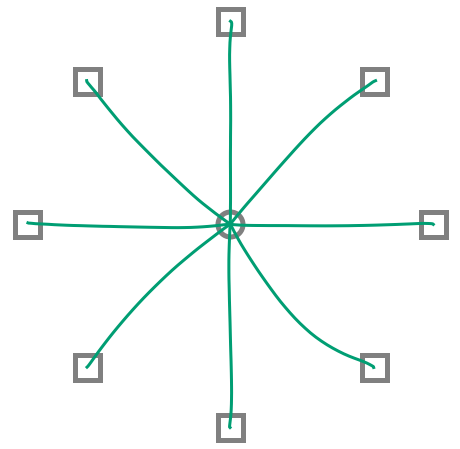

In [2]:

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*10,30+sin(angles)*10]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
        trajectories[num_sim,iter] = np.array([xILQG,yILQG]).T

        if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/ILQG_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*10,30+sin(angles)*10]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")


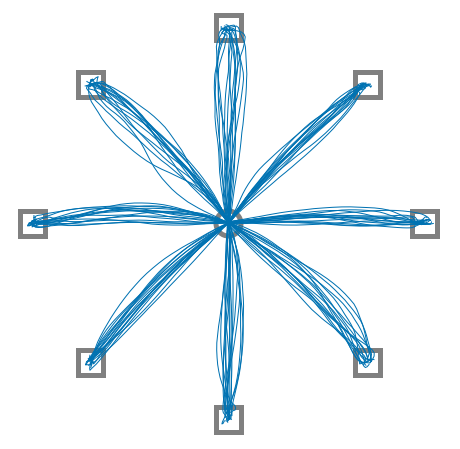

(np.float64(-11.00170094076282),
 np.float64(11.035719756019219),
 np.float64(19.0),
 np.float64(41.0))

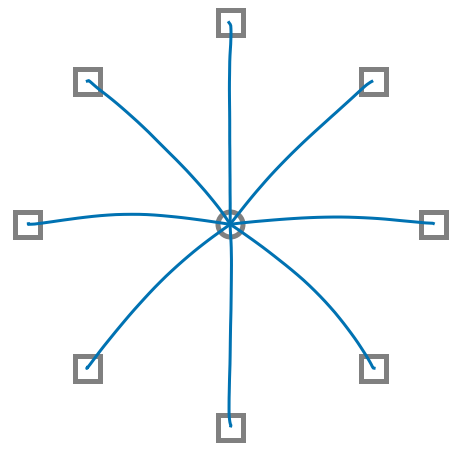

In [2]:


import sys
import os
sys.path.append('..')
os.chdir('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .4
NumIteration = 40
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*10,30+sin(angles)*10]
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-5,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        
        trajectories[num_sim,iter] = np.array([xFL,yFL]).T

        if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/FL_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*10,30+sin(angles)*10]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

In [1]:
import os
os.chdir('..')

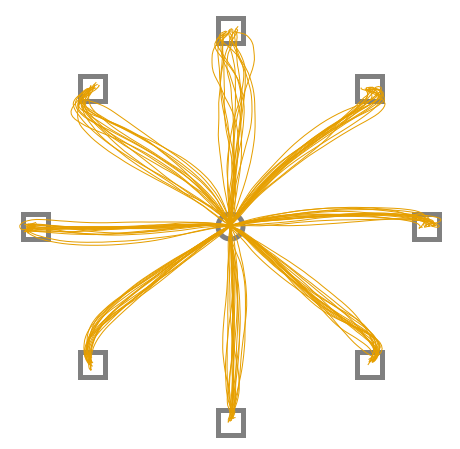

(np.float64(-17.13629190499538),
 np.float64(16.82287110272664),
 np.float64(13.5),
 np.float64(46.5))

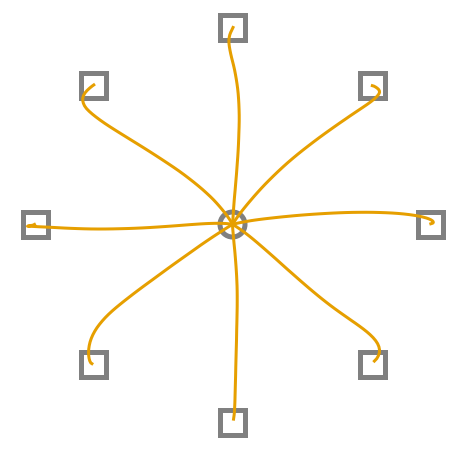

In [3]:


import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .5
NumIteration = 50
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,8,NumIteration,2))

for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,30+sin(angles)*15]
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        
        trajectories[num_sim,iter] = np.array([xLQG,yLQG]).T

        if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
        plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.savefig("img/Paper_plots/DLQG_Centerout.png",dpi = 300)
plt.show()
plt.figure(figsize = (8,8))
for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
    tg = [cos(angles)*15,30+sin(angles)*15]

    plt.plot(np.mean(trajectories[:,iter,:,0],axis = 0),np.mean(trajectories[:,iter,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([0],[30],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

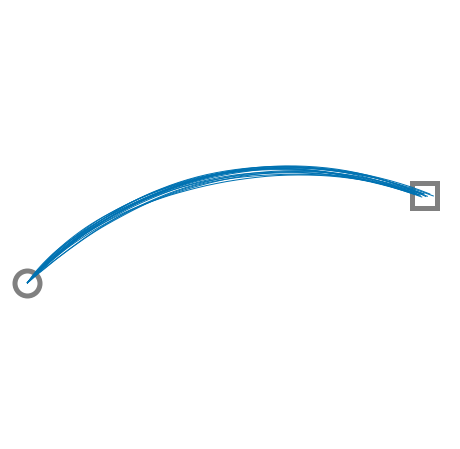

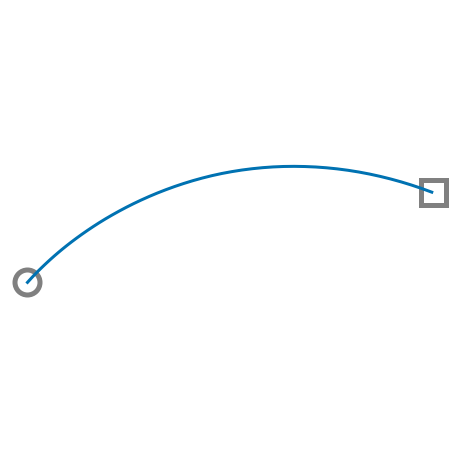

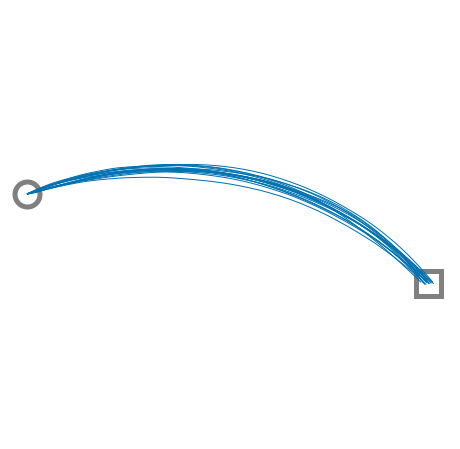

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.359900429488615),
 np.float64(43.44209098073907))

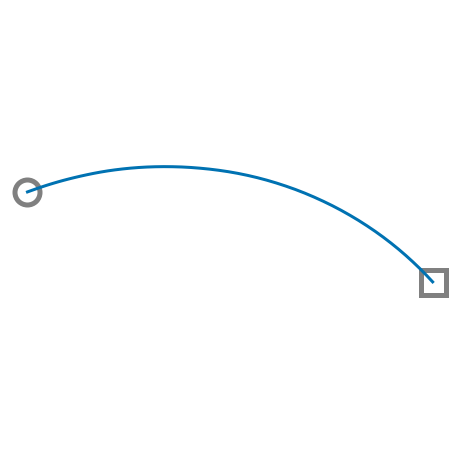

In [41]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e4,w2=1e4,w3=1,w4=1,r=1e-2,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xFL,yFL]).T
    if num_sim <= 15 : plt.plot(xFL,yFL,color = "#0072B2",linewidth = 1,label = "FL")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")
plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#0072B2",linewidth = 3,label = "FL")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

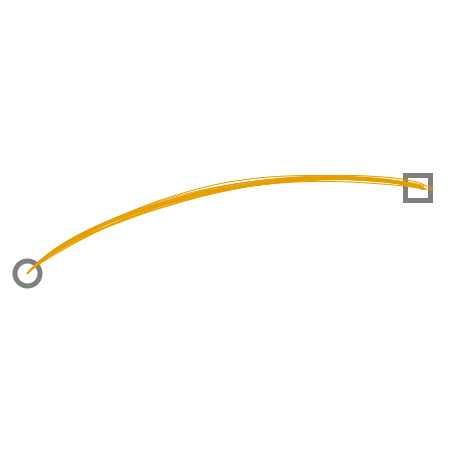

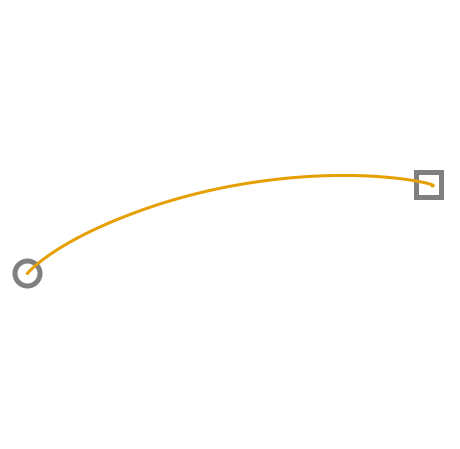

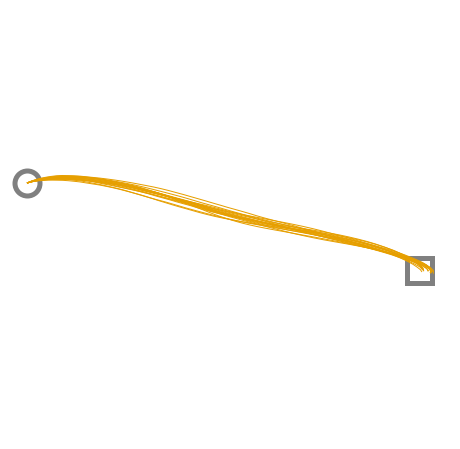

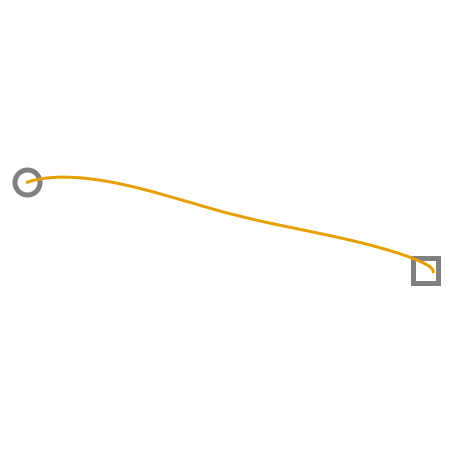

In [42]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):
    xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
    
    trajectories[num_sim] = np.array([xLQG,yLQG]).T
    if num_sim <= 15 : plt.plot(xLQG,yLQG,color = "#E69F00",linewidth = 1,label = "DLQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))



plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#E69F00",linewidth = 3,label = "DLQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8
Solution found at iteration  8


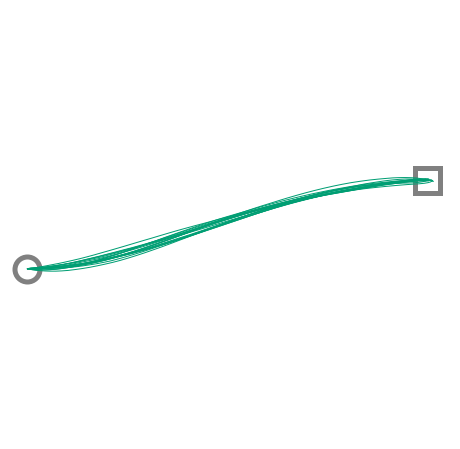

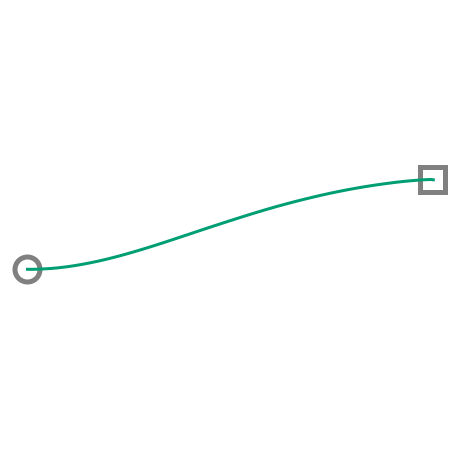

Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9
Solution found at iteration  9


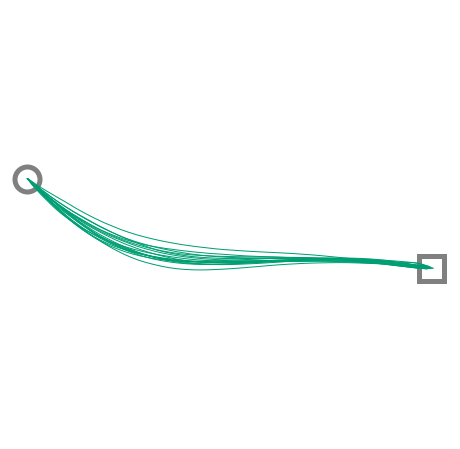

(np.float64(-22.25),
 np.float64(27.25),
 np.float64(29.5),
 np.float64(40.50000000000001))

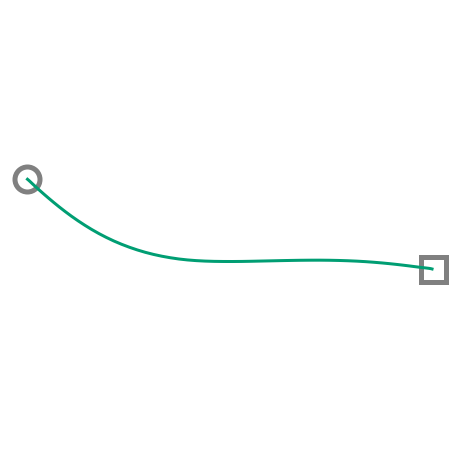

In [43]:
import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *
from Helpers.Helpers import *

st,tg = longmovement_3()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")
plt.show()

st,tg = longmovement_4()
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 20
trajectories = np.zeros((NUM_SIM,NumIteration,2))

for num_sim in range(NUM_SIM):

    xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,10,tg,st,NumIteration,delay = 0.06,Noise=True)
    trajectories[num_sim] = np.array([xILQG,yILQG]).T
    if num_sim <= 15 : plt.plot(xILQG,yILQG,color = "#009E73",linewidth = 1,label = "ILQG")
    plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
plt.axis("equal")
ax = plt.gca()
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
ax.axis("off")

plt.show()
plt.figure(figsize = (8,8))

plt.plot(np.mean(trajectories[:,:,0],axis = 0),np.mean(trajectories[:,:,1],axis = 0),color = "#009E73",linewidth = 3,label = "ILQG")
plt.plot([tg[0]],[tg[1]],marker = "s",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)


plt.axis("equal")
ax = plt.gca()
plt.plot([st[0]],[st[1]],marker = "o",markersize = 25,markeredgecolor = "grey",markerfacecolor='white',zorder = 0,markeredgewidth = 5)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.axis("off")

In [ ]:
print(ToCartesian(np.array([20,60])*pi/180))
print(ToCartesian(np.array([70,110])*pi/180))

print(compute_angles_from_cartesian(-20,30),compute_angles_from_cartesian(20,50))


(np.float64(33.921168486585955), np.float64(42.75926014917293))
(np.float64(-22.739395700229935), np.float64(28.190778623577252))
(np.float64(1.1273311120203477), np.float64(1.9262116888145653)) (np.float64(0.6149978935187046), np.float64(1.0926873644218285))


In [ ]:
def f(x, u):
    C = np.array(
        [-x[3] * (2 * x[2] + x[3]) * a2 * np.sin(x[1]), x[2] ** 2 * a2 * np.sin(x[1])]
    )

    Denominator = a3 * (a1 - a3) - a2**2 * np.cos(x[1]) ** 2
    Minv = np.array(
        [
            [a3 / Denominator, (-a2 * np.cos(x[1]) - a3) / Denominator],
            [
                (-a2 * np.cos(x[1]) - a3) / Denominator,
                (2 * a2 * np.cos(x[1]) + a1) / Denominator,
            ],
        ]
    )
    A = np.array([[2, -2, 0, 0, 1.5, -2], [0, 0, 2, -2, 2, -1.5]])

    l0 = np.array([7.32, 3.26, 6.4, 4.26, 5.95, 4.04])
    theta0 = np.array(
        [
            [
                2 * pi / 360 * 15,
                2 * pi / 360 * 4.88,
                0,
                0,
                2 * pi / 360 * 4.5,
                2 * pi / 360 * 2.12,
            ],
            [
                0,
                0,
                2 * pi / 360 * 80.86,
                2 * pi / 360 * 109.32,
                2 * pi / 360 * 92.96,
                2 * pi / 360 * 91.52,
            ],
        ]
    )
    l = 1 + A[0] * (theta0[0] - x[0]) / l0 + A[1] * (theta0[1] - x[1]) / l0
    v = A[0] * (-x[2]) / l0 + A[1] * (-x[3]) / l0

    fl = np.exp(np.abs((l**1.55 - 1) / 0.81))

    ff_v = np.where(
        v <= 0,
        (-7.39 - v) / (-7.39 + (-3.21 + 4.17) * v),
        (0.62 - (-3.12 + 4.21 * l - 2.67 * l**2) * v) / (0.62 + v),
    )
    theta = Minv @ (A @ (u * fl * ff_v) - Bdyn @ x[2:4] - C)

    return np.array([[x[2], x[3], theta[0], theta[1], 0, 0]])

c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = Q[k] + A[k].T @ S[k + 1] @ A[k] - G.T @ Hinv @ G
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:464: ComplexWarning: Casting complex values to real discards the imaginary part
  sbold[k] = qbold[k] + A[k].T @ sbold[k + 1] - G.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  s[k] = q[k] + s[k + 1] + 0.5 * temp3 - 0.5 * gbold.T @ Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:467: ComplexWarning: Casting complex values to real discards the imaginary part
  l[k] = -Hinv @ gbold
c:\Users\talex\Desktop\PhD\FL\CurrentParts\..\Controllers\ILQG6Muscles.py:468: ComplexWarning: Casting complex values to real discards the imaginary part
  L[k] = -Hi

ILQG has a cost of  0.2354589729861057 
FL has a cost of  0.29050619917129866 
DLQG has a cost of  0.4059729618988758
ILQG has a cost of  0.19142860157131952 
FL has a cost of  0.27921498716042187 
DLQG has a cost of  0.27663388355635427
ILQG has a cost of  0.16513708209353475 
FL has a cost of  0.2746519907088286 
DLQG has a cost of  0.410016492463801
ILQG has a cost of  0.23931584987076407 
FL has a cost of  0.2986357683959124 
DLQG has a cost of  0.29833023030072897
ILQG has a cost of  0.14447992076586774 
FL has a cost of  0.24458044778769797 
DLQG has a cost of  0.2747180847679159
ILQG has a cost of  0.23086802692093986 
FL has a cost of  0.20117328546606736 
DLQG has a cost of  0.3713952845237259
ILQG has a cost of  0.20301917742824505 
FL has a cost of  0.292742998628759 
DLQG has a cost of  0.2999319319953668
ILQG has a cost of  0.25743126810222994 
FL has a cost of  0.31256330869150656 
DLQG has a cost of  0.5764204909410782


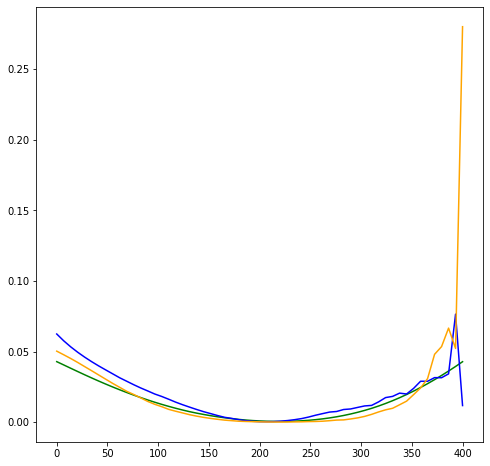

(np.float64(-0.5485023188236031),
 np.float64(11.518548695295665),
 np.float64(19.111746045242935),
 np.float64(30.518488283559865))

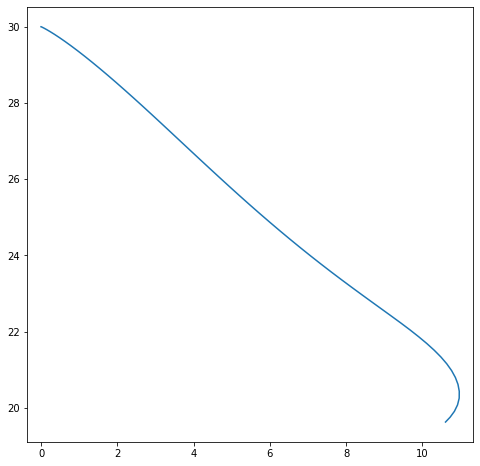

In [ ]:
def Cost_function(x,u,w1 = 1e4,w2 = 1,r = 1e-1,tg = [0,0] ):
    target1,target2 = compute_angles_from_cartesian(tg[0],tg[1])
    thetas,thetae,omegas,omegae = x[-1,:4]
    
    return w1*(thetas-target1)**2 + w1*(thetae-target2)**2 + w2*(omegas**2+omegae**2)+ np.sum(u*u) * r

import sys
sys.path.append('..')
from Controllers.FL6Muscles import *
from Controllers.ILQG6Muscles import *
from Controllers.LQGController import *

st = [0,30]
MovementTime = .6
NumIteration = 60
Time = np.linspace(0,MovementTime*1000,NumIteration)

plt.figure(figsize = (8,8))
NUM_SIM = 40
Cost_value = np.zeros((NUM_SIM,8,3))
Commands = np.zeros((NUM_SIM,8,3,NumIteration-1,6))
for num_sim in range(NUM_SIM):
    for iter,angles in enumerate(np.linspace(0,2*pi,9)[:-1]) :
        tg = [cos(angles)*15,30+sin(angles)*15]
        xILQG,yILQG,zilqg,uILQG=ILQG(MovementTime,1e4,1,.1,tg,st,NumIteration,delay = 0.06,Noise=True,print_iterations=False)
        xFL,yFL,xfl,uFL = FL_6muscles(Duration=MovementTime,w1=1e7,w2=1e7,w3=1e3,w4=1e3,r=1e-7,Num_iter=NumIteration,starting_point=st,targets=tg,Delay = 0.06,Activate_Noise=True)
        xLQG,yLQG,uDLQG,z=DLQG_6Muscles(Duration=MovementTime,r1 = .1,Num_iter=NumIteration,starting_point=st,targets=tg,plot = False,Delay = 0.06,Activate_Noise=True)
        Commands[num_sim,iter] = np.array([uILQG,uFL,uDLQG])
        Cost_value[num_sim,iter] = np.array([Cost_function(zilqg,uILQG,tg = tg),Cost_function(xfl,uFL,tg = tg),Cost_function(z.T,uDLQG,tg = tg)])

Cost_value = np.mean(Cost_value,axis = 0)
Commands = np.mean(Commands,axis = 0)
colors = ["green","blue","orange"]

for i in range(3):
    plt.plot(np.linspace(0,400,NumIteration-1),np.sum(Commands[7,i,:,:]*Commands[7,i,:,:],axis = 1),color = colors[i])
for iter in range(8):
    print("ILQG has a cost of ", Cost_value[iter,0],"\nFL has a cost of ", Cost_value[iter,1],"\nDLQG has a cost of ", Cost_value[iter,2])
plt.show()

plt.figure(figsize = (8,8))
X = np.zeros(NumIteration)
Y = np.zeros(NumIteration)
Y[0] = 30

theta0 = compute_angles_from_cartesian(0,30)
x = np.array([theta0[0],theta0[1],0,0,0,0])
for i in range(NumIteration-1):
    x += .01 * f(x,Commands[7,2,i,:]).reshape(6)
    X[i+1],Y[i+1] = ToCartesian(x[:2])
plt.plot(X,Y)
plt.axis("equal")